# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [140]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv('ExtraaLearn.csv')

## Data Overview

- Observations
- Sanity checks

In [65]:
shape = df.shape 
duplicates = df.duplicated().sum()
print(f'There are {shape[0]} rows and {shape[1]} columns with {duplicates} duplicated rows\n')

df.info()

There are 4612 rows and 15 columns with 0 duplicated rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 1

In [4]:
# There are no missing values
df.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [55]:
length = len(df)
unique_ids_count = len(df['ID'].unique())
if length == unique_ids_count:
    print('we should drop ids because they do hold any predictive signal')
else:
    print('need to explore why there are duplicate ids')
df = df.drop(columns=['ID'])

we should drop ids because they do hold any predictive signal


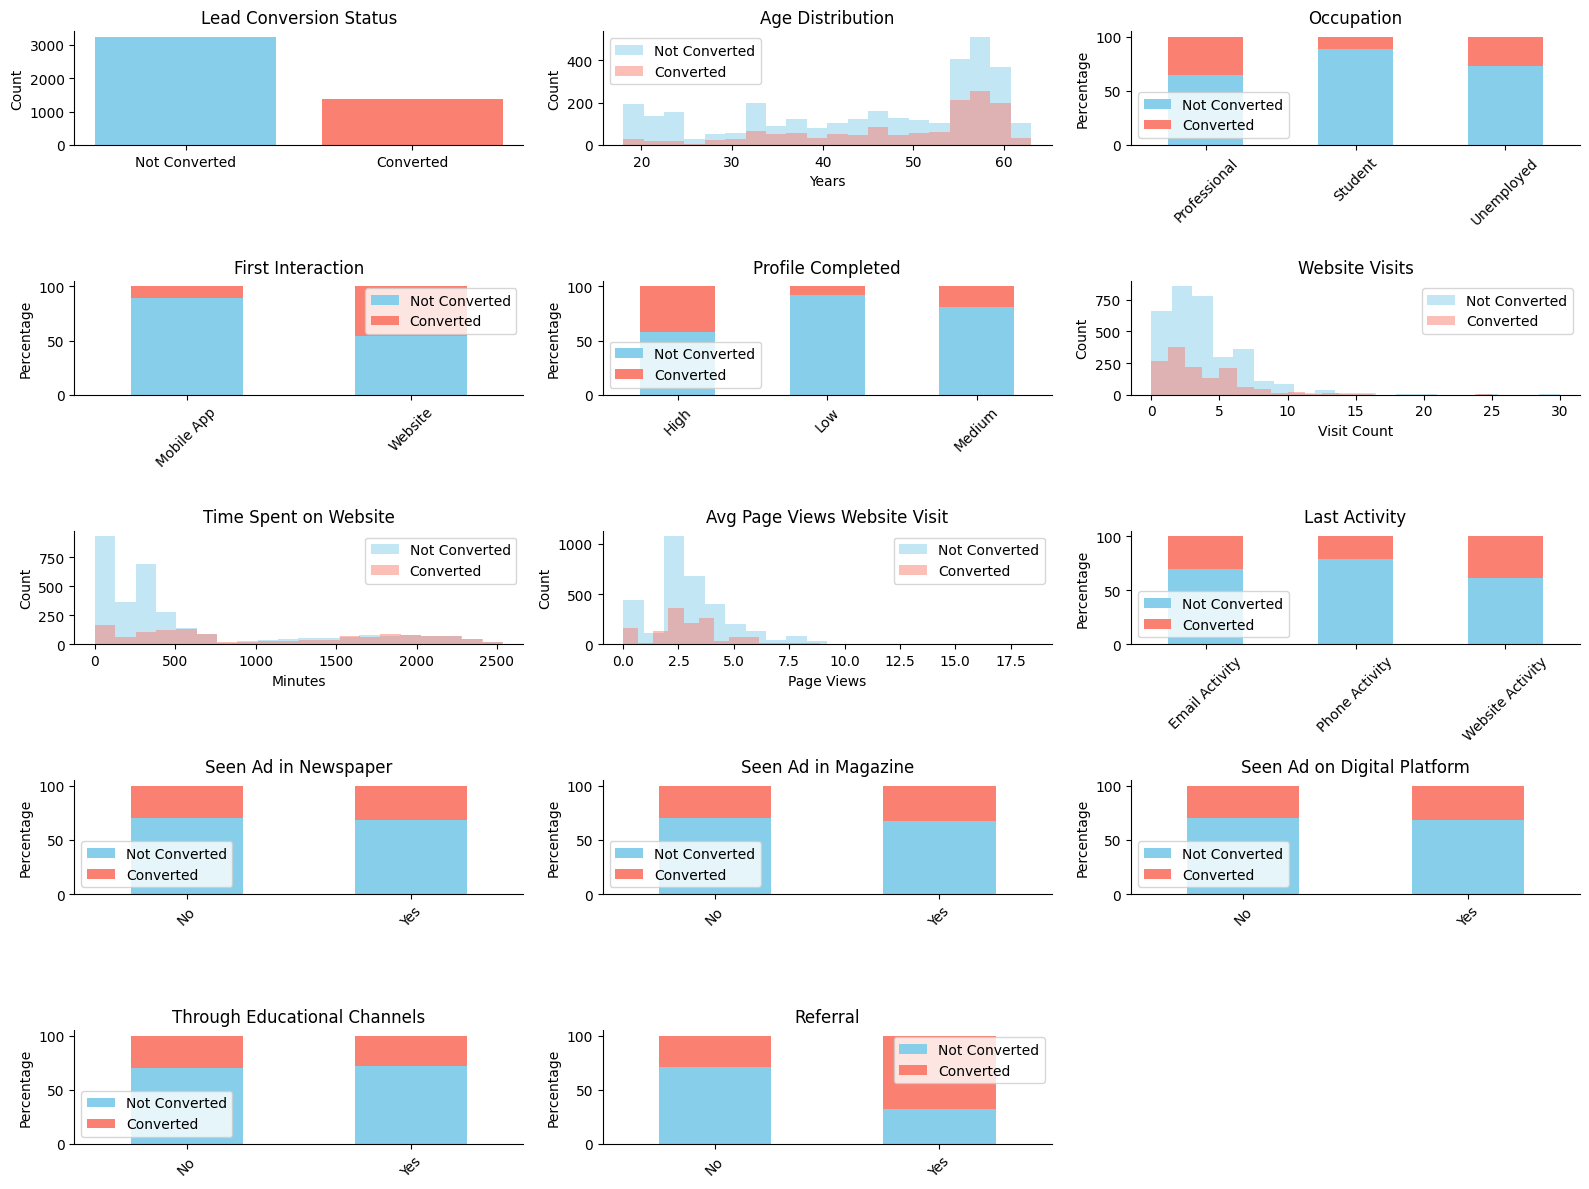

In [157]:
class ChartMaker:
    def __init__(self, df, rows, cols):
        self.df = df 
        self.fig, self.axs = plt.subplots(rows, cols, figsize=(16, 12))
        self.axs = self.axs.flatten()

    def repeated_methods(self, ax, title, y_label):
        ax.set_title(title)
        ax.set_ylabel(y_label)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    def simple_bar(self, ax, col, title, x_ticks):
        counts = self.df[col].value_counts()
        ax.bar(counts.index, counts.values, color=['skyblue', 'salmon'])
        ax.set_xticks([0, 1])
        ax.set_xticklabels(x_ticks)
        self.repeated_methods(ax, title, 'Count')

    def histo_with_hue(self, ax, col, title, x_label):
        self.df[self.df['status'] == 0][col].plot(kind='hist', bins=20, alpha=0.5, ax=ax, color='skyblue', label='Not Converted')
        self.df[self.df['status'] == 1][col].plot(kind='hist', bins=20, alpha=0.5, ax=ax, color='salmon', label='Converted')
        ax.set_xlabel(x_label)
        ax.legend()
        self.repeated_methods(ax, title, 'Count')

    def bar_with_hue(self, ax, col, title):
        status_counts = df.groupby([col, 'status']).size().unstack(fill_value=0)
        # status_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=ax)
        status_counts = status_counts.div(status_counts.sum(axis=1), axis=0) * 100
        status_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=ax)
        ax.legend(['Not Converted', 'Converted'])
        ax.tick_params(axis='x', rotation=45)
        ax.set_xlabel('')
        self.repeated_methods(ax, title, 'Percentage')


chart_maker = ChartMaker(df, 5, 3)
fig, axs = chart_maker.fig, chart_maker.axs
chart_maker.simple_bar(axs[0], 'status', 'Lead Conversion Status', ['Not Converted', 'Converted'])
chart_maker.histo_with_hue(axs[1], 'age', 'Age Distribution', 'Years')
chart_maker.bar_with_hue(axs[2], 'current_occupation', 'Occupation')
chart_maker.bar_with_hue(axs[3], 'first_interaction', 'First Interaction')
chart_maker.bar_with_hue(axs[4], 'profile_completed', 'Profile Completed')
chart_maker.histo_with_hue(axs[5], 'website_visits', 'Website Visits', 'Visit Count')
chart_maker.histo_with_hue(axs[6], 'time_spent_on_website', 'Time Spent on Website', 'Time Unit')
chart_maker.histo_with_hue(axs[7], 'page_views_per_visit', 'Avg Page Views Website Visit', 'Page Views')
chart_maker.bar_with_hue(axs[8], 'last_activity', 'Last Activity')
chart_maker.bar_with_hue(axs[9], 'print_media_type1', 'Seen Ad in Newspaper')
chart_maker.bar_with_hue(axs[10], 'print_media_type2', 'Seen Ad in Magazine')
chart_maker.bar_with_hue(axs[11], 'digital_media', 'Seen Ad on Digital Platform')
chart_maker.bar_with_hue(axs[12], 'educational_channels', 'Through Educational Channels')
chart_maker.bar_with_hue(axs[13], 'referral', 'Referral')
axs[14].axis('off')
fig.tight_layout()
plt.show()

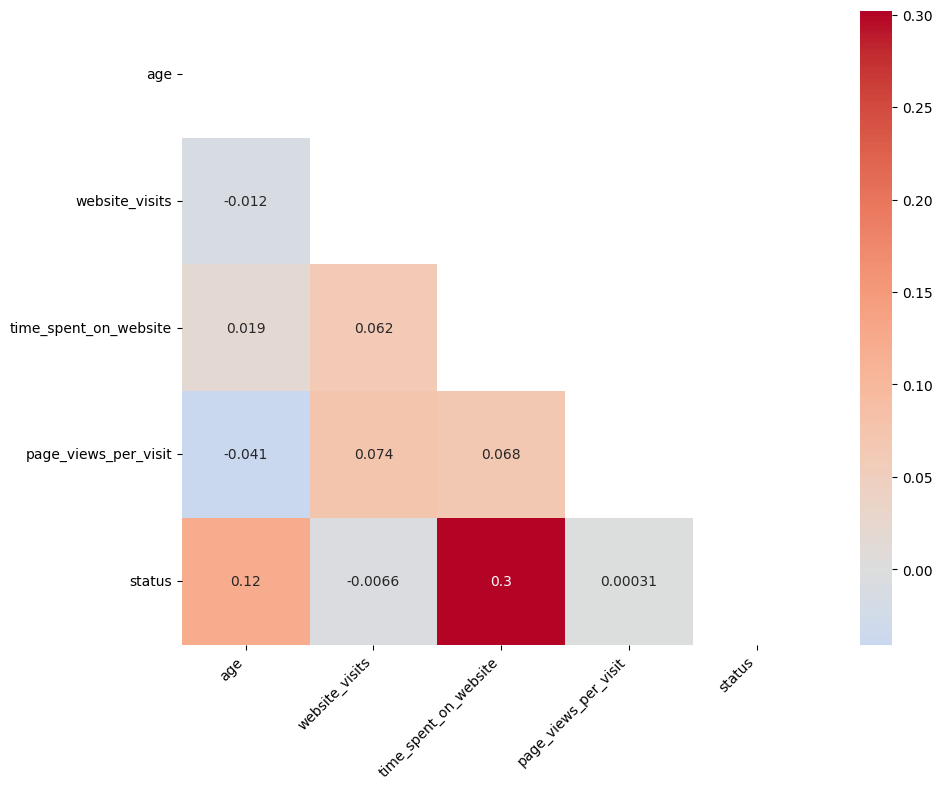

In [29]:
continuous_df = df[['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status']]
corr = continuous_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, mask=np.triu(corr))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


In [57]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    print('\n' + '-' * 20 + '\n')

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64

--------------------

first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64

--------------------

profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64

--------------------

last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64

--------------------

print_media_type1
No     4115
Yes     497
Name: count, dtype: int64

--------------------

print_media_type2
No     4379
Yes     233
Name: count, dtype: int64

--------------------

digital_media
No     4085
Yes     527
Name: count, dtype: int64

--------------------

educational_channels
No     3907
Yes     705
Name: count, dtype: int64

--------------------

referral
No     4519
Yes      93
Name: count, dtype: int64

--------------------



In [81]:
ads_and_referall = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
df['has_yes'] = df[ads_and_referall].eq('Yes').any(axis=1)
seen_ad = len(df[(df['status'] == 1) & (df['has_yes'] == True)])
converted = len(df[df['status'] == 1])
print(f'{round(seen_ad / converted * 100, 2)}% of converted leads were exposed to an ad or referral')

39.65% of converted leads were exposed to an ad or referral


In [88]:
df['current_occupation'].value_counts()

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64

In [87]:
had_referral = df[df['referral'] == 'Yes'] 
converted, not_converted = len(had_referral[had_referral['status'] == 1]), len(had_referral[had_referral['status'] == 0])
percent = converted / (converted + not_converted)
print(f'{round(percent * 100, 2)}% of people with a referral were converted')

67.74% of people with a referral were converted


**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information. Does having more details about a prospect increase the chances of conversion?

**Observations**
- Most instances of the data are not converted. This represents an imblance that will have to be addressed when training the data
- Professionals are most likely to be converted followed by unemployed. The least likely is Student. 
- The moblie app isn't as successful at converting leads as the website when it's a first visit. 
- The more a user completes their profile the more likely they are to be converted. 
- Website visits and average views per visit do not show a strong relationship with conversion and are highly right-skewed.
- Time spent on the website appears to have a meaningful correlation with conversion
- Almost 40% of converted leads saw an advertisment or had a referral 
- About 68% of leads that had a referral were converted 
- There's a slight correlations with age and conversion, older people seem more likely to be converted

**Answers to Questions**
1. Professionals are the most likely to convert, likely due to needing these skills for work and having the financial resources to pay for the course. Unemployed individuals convert less frequently, and students have the lowest conversion rate, likely because they are already gaining similar skills through their studies. 
2. Leads who first interacted via the website are more likely to convert than those who came through other channels, suggesting a strong first impression from the website.
3. The majority of leads learn about the company through educational channels, which serves as an effective mode of initial engagement.
4. Referrals show the highest conversion rate among all channels, though their reach is relatively low.
5. Leads who complete their profiles in detail are more likely to convert, indicating that sharing more information may correlate with stronger engagement.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [100]:
# there are no missing values
df = pd.read_csv('ExtraaLearn.csv')
df = df.drop(columns=['ID'])
df.isnull().sum()

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [171]:
class PrepDataFirstGo:
    def __init__(self, df):
        self.df = df 
        self.drop_outliers()
        self.create_exposed_ad()
        self.create_exposed()
        self.create_media_score()
        self.create_ordinal_profile_complete()
        self.create_age_groups()
        self.total_pages_visited()
        self.avg_time_per_visit()
        self.split_data()

    def drop_outliers(self):
        original_size = len(self.df)
        for col in ['website_visits', 'time_spent_on_website', 'page_views_per_visit']:
            mean, std = self.df[col].mean(), self.df[col].std()
            self.df = self.df[(self.df[col] >= mean - 3 * std) & (self.df[col] <= mean + 3 * std)] 
        new_size = len(self.df)
        lost_percent = (original_size - new_size) / original_size
        print(f'{round(lost_percent * 100, 2)}% of data was lost after dropping outliers')

    def create_exposed_ad(self):
        ads = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels'] 
        self.df['exposed_ad'] = self.df[ads].eq('Yes').any(axis=1)
        seen_an_ad = sum(self.df['exposed_ad'])
        percent = seen_an_ad / len(self.df)
        print(f'{round(percent * 100, 2)}% were exposed to an ad')

    def create_exposed(self):
        ads = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral'] 
        self.df['exposed'] = self.df[ads].eq('Yes').any(axis=1)
        seen_an_ad = sum(self.df['exposed'])
        percent = seen_an_ad / len(self.df)
        print(f'{round(percent * 100, 2)}% were exposed to an ad or referral')

    def create_media_score(self):
        media_columns = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels']
        self.df['media_score'] = self.df[media_columns].apply(lambda x: x.eq('Yes')).sum(axis=1)
        mean, std = self.df['media_score'].mean(), self.df['media_score'].std()
        print(f'The average media score is {round(mean,2)} with an std of {round(std, 2)}')

    def create_ordinal_profile_complete(self):
        mapping = {'High': 3, 'Medium': 2, 'Low': 1}
        self.df['profile_ordinal'] = self.df['profile_completed'].map(mapping)
        print(self.df['profile_ordinal'].value_counts())
        
    def create_age_groups(self):
        self.df['age_group'] = pd.qcut(self.df['age'], q=4, labels=['Group 1', 'Group 2', 'Group 3', 'Group 4'])
        print(self.df['age_group'].value_counts())

    def total_pages_visited(self):
        self.df['avg_page_views'] = self.df['website_visits'] * self.df['page_views_per_visit']
        mean, std = self.df['avg_page_views'].mean(), self.df['avg_page_views'].std()
        print(f'The average pages visited is {round(mean,2)} with an std of {round(std, 2)}')

    def avg_time_per_visit(self):
        self.df['avg_time_per_visit'] = self.df['time_spent_on_website'] / self.df['website_visits']
        mean, std = self.df['avg_time_per_visit'].mean(), self.df['avg_time_per_visit'].std()
        print(f'The avgerate time per visit is {round(mean, 2)} with an std of {round(std, 2)}')

    def split_data(self):
        X = self.df.drop(columns=['status'])
        y = self.df['status']
        return train_test_split(X, y, test_size=0.3, stratify=y, random_state=22)


data_prepper = PrepDataFirstGo(df)
new_df = data_prepper.df 
X_train, X_test, y_train, y_test = data_prepper.split_data()
        

2.28% of data was lost after dropping outliers
36.01% were exposed to an ad
37.3% were exposed to an ad or referral
The average media score is 0.42 with an std of 0.62
profile_ordinal
3    2218
2    2185
1     104
Name: count, dtype: int64
age_group
Group 1    1172
Group 3    1143
Group 2    1134
Group 4    1058
Name: count, dtype: int64
The average pages visited is 10.37 with an std of 10.06
The avgerate time per visit is 319.03 with an std of 427.0


**Observatiosn**
- There are no missing values
- We dropped the extreme outliers that were more than 3 stds for website_visits, time_spent_on_website, and pages_views_per_visit and almost 2% of of the data was lost
- We made a feature of 'exposed_ad' which means that they were exposed to some kind of advertisment 
- We made a feature of 'exposed' which means that they were exposed to some kind of advertisment or referral 
- We made a feature called media_score whichs sums up the amount of ads and referrals the lead was exposed to
- We made a feaute called profile_completed_ordinal and converted low, medium and high to 1, 2, and 3
- We made aging bins for the aging feature with values of Group 1, Group 2, Group 3 and Group 4 
- We made a feature of avg_page_views by multipling website_visits and pages_view_per_visit 
- We made a feature of a avg_time_per_visit by dividing time_spent_on_website and website_visits 
- We split the data into test and train using stratify=y so that 'status' is proportional in both sets 


## EDA

- It is a good idea to explore the data once again after manipulating it.

KeyError: 'exposed_ad'

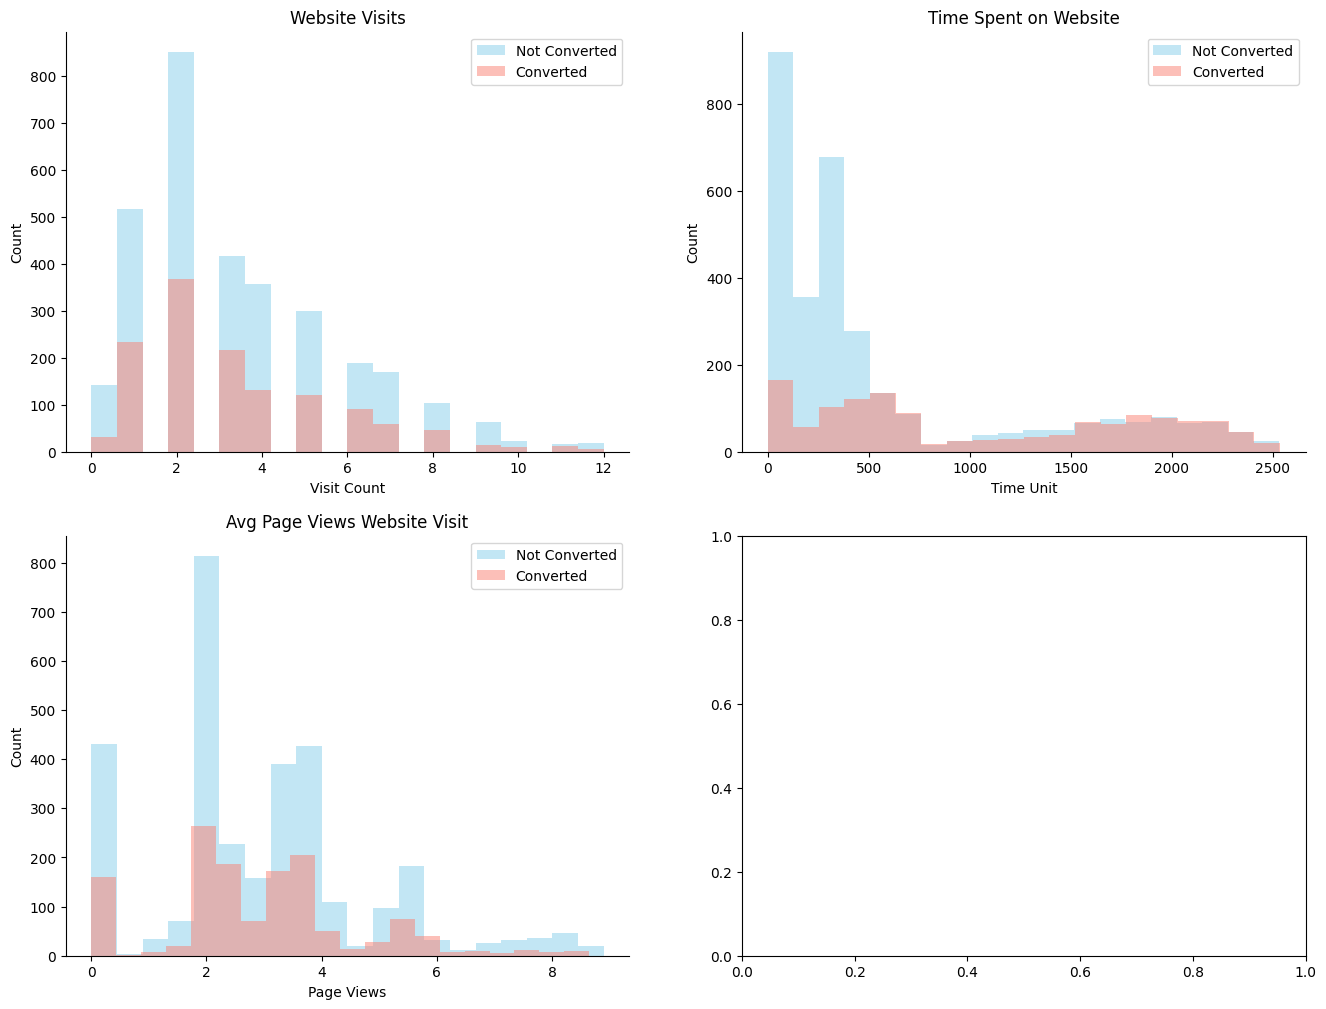

In [172]:
chart_maker2 = ChartMaker(new_df, 2, 2)
fig, axs = chart_maker2.fig, chart_maker2.axs 
chart_maker2.histo_with_hue(axs[0], 'website_visits', 'Website Visits', 'Visit Count')
chart_maker2.histo_with_hue(axs[1], 'time_spent_on_website', 'Time Spent on Website', 'Time Unit')
chart_maker2.histo_with_hue(axs[2], 'page_views_per_visit', 'Avg Page Views Website Visit', 'Page Views')
chart_maker2.bar_with_hue(axs[3], 'exposed_ad', 'Exposed to Ads')

## Building a Decision Tree model

In [ ]:
# test with confustion_matrix, class_weight='blananced'

## Do we need to prune the tree?

## Building a Random Forest model

## Do we need to prune the tree?

## Actionable Insights and Recommendations